# Predicting Insurance Price using `tensor-flow` Neural Network Regression Model

## [Dataset Reference](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)

# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# 2. Loading the Dataset

In [3]:
df = pd.read_csv("insurance.csv")

# 3. Exploratory Data Analysis

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows, 7 columns, and no non-missing values.

# 4. Visualizing the Data

In [7]:
numerical_cols = df._get_numeric_data().columns
categorical_cols = df.drop(columns=numerical_cols).columns

In [8]:
def categorical_dist(cols, df):
    
    n_rows = (len(cols) // 2) + 1
    plt.figure(figsize=(10, 8))
    
    for i, c in enumerate(cols):
        plt.subplot(n_rows, 2, i+1)
        sns.histplot(df[c])
        plt.title(f"Categorical Distribution by {c.title()}")
        
    plt.tight_layout()              
    plt.show()

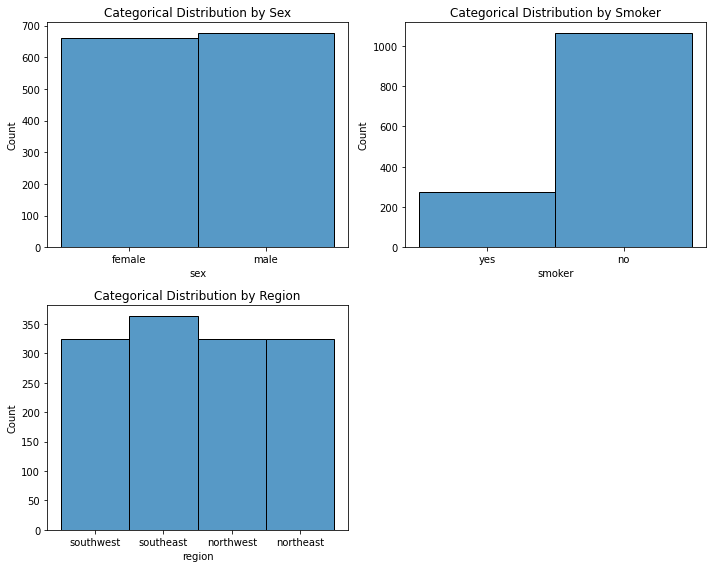

In [9]:
categorical_dist(categorical_cols, df)

In [10]:
df.groupby(["smoker"]).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [11]:
def numerical_dist(cols, df):
    
    n_rows = (len(cols) // 2) + 1
    plt.figure(figsize=(10, 8))
    
    for i, c in enumerate(cols):
        plt.subplot(n_rows, 2, i+1)
        sns.histplot(df[c])
        plt.title(f"Numerical Distribution by {c.title()}")
        
    plt.tight_layout()              
    plt.show()

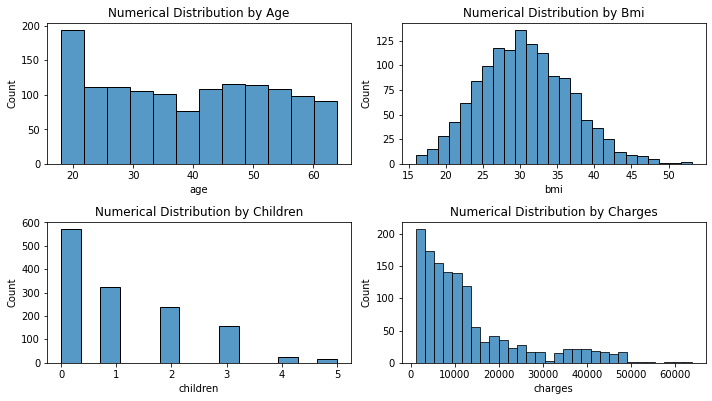

In [12]:
numerical_dist(numerical_cols, df)

# 4. Numerical Encoding of Categorical Features

In [13]:
df_one_hot = pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_one_hot.drop(columns=["charges"])
y = df["charges"]

In [16]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [17]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
len(X_train), len(X_test)

(1070, 268)

# 5. Building the Neural Netork Regression Model

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 6. Compiling the Model

In [23]:
model.compile(
    loss=["mae"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

# 7. Saving the Model

In [24]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 822us/step - loss: 13310.7373 - mae: 13310.7373
Epoch 2/100
34/34 [==============================] - 0s 809us/step - loss: 13273.1016 - mae: 13273.1016
Epoch 3/100
34/34 [==============================] - 0s 846us/step - loss: 13218.5830 - mae: 13218.5830
Epoch 4/100
34/34 [==============================] - 0s 928us/step - loss: 13135.9414 - mae: 13135.9414
Epoch 5/100
34/34 [==============================] - 0s 853us/step - loss: 13012.6992 - mae: 13012.6992
Epoch 6/100
34/34 [==============================] - 0s 870us/step - loss: 12833.9033 - mae: 12833.9033
Epoch 7/100
34/34 [==============================] - 0s 894us/step - loss: 12584.4990 - mae: 12584.4990
Epoch 8/100
34/34 [==============================] - 0s 905us/step - loss: 12247.6895 - mae: 12247.6895
Epoch 9/100
34/34 [==============================] - 0s 937us/step - loss: 11808.0303 - mae: 11808.0303
Epoch 10/100
34/34 [==============================] - 0s 928us/s

34/34 [==============================] - 0s 734us/step - loss: 6823.0850 - mae: 6823.0850
Epoch 81/100
34/34 [==============================] - 0s 844us/step - loss: 6808.9424 - mae: 6808.9424
Epoch 82/100
34/34 [==============================] - 0s 818us/step - loss: 6797.8110 - mae: 6797.8110
Epoch 83/100
34/34 [==============================] - 0s 740us/step - loss: 6783.4907 - mae: 6783.4907
Epoch 84/100
34/34 [==============================] - 0s 760us/step - loss: 6766.4399 - mae: 6766.4399
Epoch 85/100
34/34 [==============================] - 0s 812us/step - loss: 6753.1406 - mae: 6753.1406
Epoch 86/100
34/34 [==============================] - 0s 724us/step - loss: 6737.0190 - mae: 6737.0190
Epoch 87/100
34/34 [==============================] - 0s 716us/step - loss: 6722.0322 - mae: 6722.0322
Epoch 88/100
34/34 [==============================] - 0s 737us/step - loss: 6706.6021 - mae: 6706.6021
Epoch 89/100
34/34 [==============================] - 0s 712us/step - loss: 6691.0635 

In [28]:
history = pd.DataFrame(model.history.history)

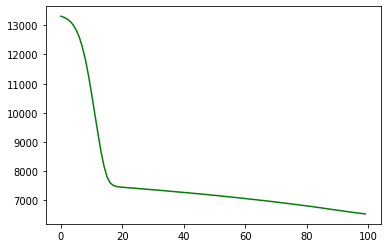

In [37]:
plt.plot(history["loss"], color="g")
plt.show()

In [36]:
history["loss"] == history["mae"]

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Length: 100, dtype: bool

# 8. Evaluating the Model

In [38]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 785us/step - loss: 6417.2144 - mae: 6417.2144


[6417.21435546875, 6417.21435546875]

In [39]:
np.mean(y)

13270.422265141257

## Loss = 6417

# 9. Improving the Model by Normalizing the numerical features

In [40]:
numerical_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [41]:
numerical_cols = numerical_cols.drop("charges")

In [42]:
numerical_cols

Index(['age', 'bmi', 'children'], dtype='object')

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [44]:
ct = make_column_transformer(
    (MinMaxScaler(), numerical_cols),
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols)
)

In [45]:
X_normal = df.drop(columns=["charges"])
y_normal = df["charges"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.2, random_state=42)

In [47]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

In [48]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [49]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

# 10. Retraining the model using the normalized features

In [50]:
tf.random.set_seed(42)

In [51]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

In [56]:
model2.compile(
    loss=["mae"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

In [59]:
history2 = model2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 3485.3315 - mae: 3485.3315
Epoch 2/100
34/34 [==============================] - 0s 911us/step - loss: 3478.5798 - mae: 3478.5798
Epoch 3/100
34/34 [==============================] - 0s 963us/step - loss: 3480.8513 - mae: 3480.8513
Epoch 4/100
34/34 [==============================] - 0s 961us/step - loss: 3479.9622 - mae: 3479.9622
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 3479.3926 - mae: 3479.3926
Epoch 6/100
34/34 [==============================] - 0s 973us/step - loss: 3492.7393 - mae: 3492.7393
Epoch 7/100
34/34 [==============================] - 0s 976us/step - loss: 3477.9897 - mae: 3477.9897
Epoch 8/100
34/34 [==============================] - 0s 997us/step - loss: 3483.9709 - mae: 3483.9709
Epoch 9/100
34/34 [==============================] - 0s 961us/step - loss: 3479.5176 - mae: 3479.5176
Epoch 10/100
34/34 [==============================] - 0s 904us/step - loss: 3484.3689 

34/34 [==============================] - 0s 972us/step - loss: 3483.0015 - mae: 3483.0015
Epoch 82/100
34/34 [==============================] - 0s 870us/step - loss: 3478.7532 - mae: 3478.7532
Epoch 83/100
34/34 [==============================] - 0s 976us/step - loss: 3480.1108 - mae: 3480.1108
Epoch 84/100
34/34 [==============================] - 0s 904us/step - loss: 3481.3052 - mae: 3481.3052
Epoch 85/100
34/34 [==============================] - 0s 856us/step - loss: 3475.4146 - mae: 3475.4146
Epoch 86/100
34/34 [==============================] - 0s 898us/step - loss: 3476.9238 - mae: 3476.9238
Epoch 87/100
34/34 [==============================] - 0s 826us/step - loss: 3482.6821 - mae: 3482.6821
Epoch 88/100
34/34 [==============================] - 0s 796us/step - loss: 3480.5195 - mae: 3480.5195
Epoch 89/100
34/34 [==============================] - 0s 816us/step - loss: 3479.7673 - mae: 3479.7673
Epoch 90/100
34/34 [==============================] - 0s 838us/step - loss: 3480.0637 

## Loss = 3482

# 11. Tweaking the model to improve the loss

In [60]:
tf.random.set_seed(42)

In [61]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [66]:
model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=tf.keras.metrics.mae
)

In [67]:
history3 = model3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 835us/step - loss: 3633.8750 - mean_absolute_error: 3633.8750
Epoch 2/100
34/34 [==============================] - 0s 952us/step - loss: 3630.7744 - mean_absolute_error: 3630.7744
Epoch 3/100
34/34 [==============================] - 0s 996us/step - loss: 3630.1006 - mean_absolute_error: 3630.1006
Epoch 4/100
34/34 [==============================] - 0s 964us/step - loss: 3626.5732 - mean_absolute_error: 3626.5732
Epoch 5/100
34/34 [==============================] - 0s 955us/step - loss: 3627.7444 - mean_absolute_error: 3627.7444
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 3623.4175 - mean_absolute_error: 3623.4175
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 3620.5681 - mean_absolute_error: 3620.5681
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3619.9507 - mean_absolute_error: 3619.9507
Epoch 9/100
34/34 [==============================] - 0s 999us/

34/34 [==============================] - 0s 968us/step - loss: 3515.2046 - mean_absolute_error: 3515.2046
Epoch 71/100
34/34 [==============================] - 0s 922us/step - loss: 3514.0823 - mean_absolute_error: 3514.0823
Epoch 72/100
34/34 [==============================] - 0s 984us/step - loss: 3511.2969 - mean_absolute_error: 3511.2969
Epoch 73/100
34/34 [==============================] - 0s 899us/step - loss: 3511.2498 - mean_absolute_error: 3511.2498
Epoch 74/100
34/34 [==============================] - 0s 866us/step - loss: 3508.1543 - mean_absolute_error: 3508.1543
Epoch 75/100
34/34 [==============================] - 0s 852us/step - loss: 3508.1377 - mean_absolute_error: 3508.1377
Epoch 76/100
34/34 [==============================] - 0s 811us/step - loss: 3508.3623 - mean_absolute_error: 3508.3623
Epoch 77/100
34/34 [==============================] - 0s 799us/step - loss: 3504.0920 - mean_absolute_error: 3504.0920
Epoch 78/100
34/34 [==============================] - 0s 866u

## Loss = 3476